In [1]:
from pathlib import Path
from anndata import read_h5ad

import sys
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.stats import nbinom, pearsonr

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

from tqdm import tqdm

import pickle
import anndata as ad
from scipy.stats import zscore

In [3]:
import sys
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import gene_plot

In [4]:
from scipy import stats

def plot_correlation(df, attr_1, attr_2):
    r = stats.pearsonr(df[attr_1], 
                       df[attr_2])[0] **2

    g = sns.lmplot(data=df,
        x=attr_1, y=attr_2,
        height=5, legend=True
    )
    # g.set(ylim=(0, 360), xlim=(0,360))

    g.set_axis_labels(attr_1, attr_2)
    plt.annotate(r'$R^2:{0:.2f}$'.format(r),
                (max(df[attr_1])*0.9, max(df[attr_2])*0.9))
    return g


def calculate_correlation(attr_1, attr_2):
    r = stats.pearsonr(attr_1, 
                       attr_2)[0]
    return r

def calculate_correlation_2(attr_1, attr_2):
    r = stats.spearmanr(attr_1, 
                       attr_2)[0]
    return r

In [14]:
PATH_PRED = Path("/scratch/imb/Xiao/Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_liver_selected_gene")
PATH_GC = Path("/scratch/imb/Xiao/DATA/DATASET/Liver_visium")
OUT_PATH = PATH_PRED / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [15]:
all_adata = ad.read_h5ad(PATH_GC / "all_adata.h5ad")

In [6]:
# open pickle file
with open(PATH_PRED / "top_100gene.pickle", "rb") as f:
    top_100gene = pickle.load(f)

In [8]:
for i in top_100gene:
    print(i)

APOE
CLU
C1S
SERPING1
C1R
APOB
MGST1
FN1
A2M
AMBP
SAA1
F12
ARG1
B2M
C3
CFB
C9
C4BPA
CTSD
SERPINA1
CD81
MIF
C2
ST6GAL1
PFN1
RHOB
CTSB
C5
HSD11B1
C8G
SDC1
CFI
NTHL1
IGFBP3
C6
NUPR1
PCK1
AQP9
LRP1
C8A
ERRFI1
MASP2
CCL14
MGMT
C8B
CD99
IDH2
STOM
IFITM2
LAMP1
CD63
HLA-E
EFNA1
ID2
SDHA
DDIT4
GNAS
TIMP1
CD14
HSPB1
ZFP36L1
CEBPD
RHOA
PDIA4
MGAT1
SDC2
HSP90B1
RXRA
SDHB
POLD4
NAMPT
XBP1
GADD45G
MYH9
C7
PSMB7
TAPBP
LBP
CEBPA
LGALS1
BNIP3
TOLLIP
STAT2
TNFRSF1A
HMGB1
ZFP36L2
NFKBIA
CXCL12
SDHD
PYGL
HAMP
CTSL
C1QA
IL6ST
GPI
RPN2
IL1RAP
APP
PDIA6
MASP1


In [9]:
liver_gene_list = [
    "CEBPA",
    "SERPINA1",
    "CD81",
    "C1R",
    "C4BPA",
    "C8B",
    "C8A",
    "C2",
    "C3",
    "HSD11B1",
    "C6",
    "C8G",
    "NTHL1",
    "C9",
    "APOE",
    "CD14",
    "LBP",
    "PCK1",
    "AMBP",
    "MGMT",
    "F12",
    "PDIA4",
    "EFNA1",
    "TOLLIP",
    "SERPING1",
    "MASP2",
    "MASP1",
    "HAMP",
    "CFB"]

In [10]:
for i, gene in enumerate(top_100gene):
    if gene in liver_gene_list:
        print(i, gene)

0 APOE
3 SERPING1
4 C1R
9 AMBP
11 F12
14 C3
15 CFB
16 C9
17 C4BPA
19 SERPINA1
20 CD81
22 C2
28 HSD11B1
29 C8G
32 NTHL1
34 C6
36 PCK1
39 C8A
41 MASP2
43 MGMT
44 C8B
52 EFNA1
58 CD14
63 PDIA4
77 LBP
78 CEBPA
81 TOLLIP
90 HAMP
99 MASP1


In [11]:
gene_to_plot = ["APOE", "SERPING1", "C1R"]

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


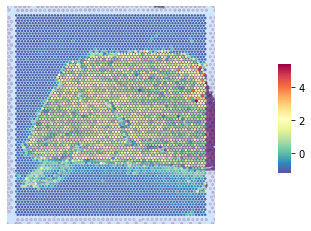

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


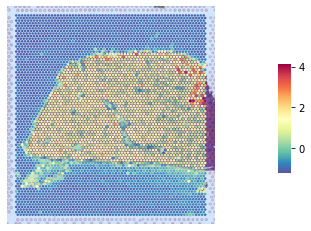

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


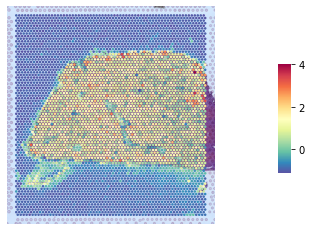

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


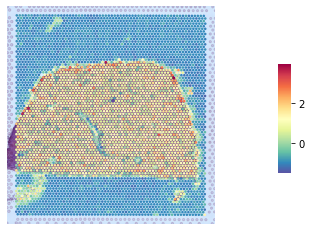

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


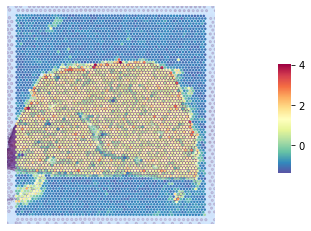

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


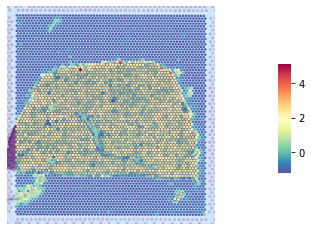

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


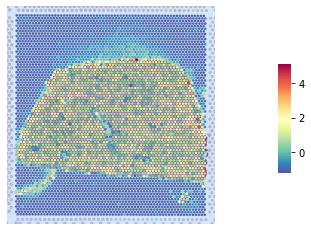

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


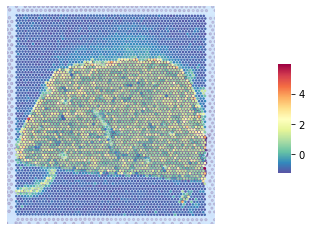

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


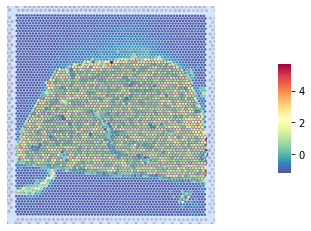

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


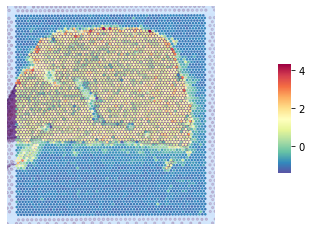

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


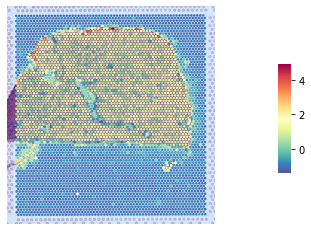

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


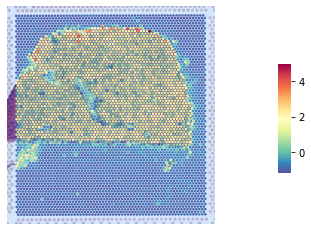

<Figure size 432x288 with 0 Axes>

In [12]:
for i in PATH_PRED.glob("./pred*"):
    sample = i.stem.split("pred_")[1]
    adata = ad.read_h5ad(i)
    adata.X = adata.to_df().apply(zscore)
    for gene in gene_to_plot:
        try:
            gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                     output=str(OUT_PATH), name=f"pred_{sample}_{gene}.pdf")
            plt.show()
        except:
            continue

In [16]:
samples = all_adata.obs["library_id"].unique()

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


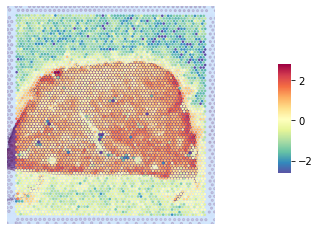

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


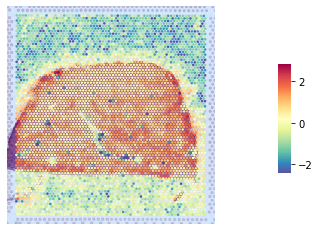

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


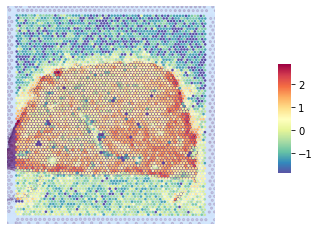

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


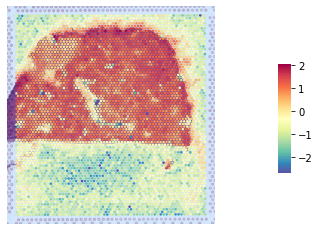

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


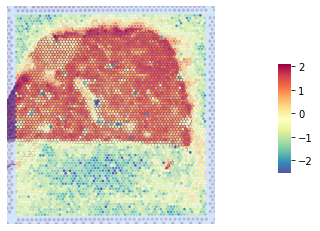

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


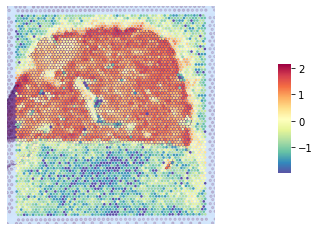

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


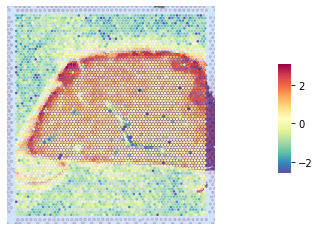

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


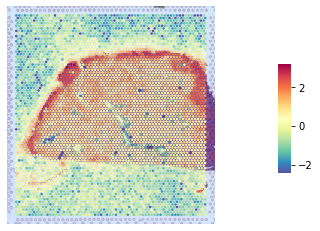

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


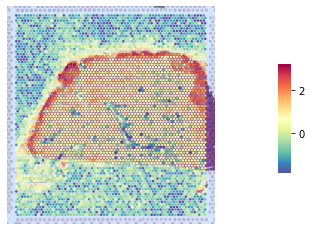

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


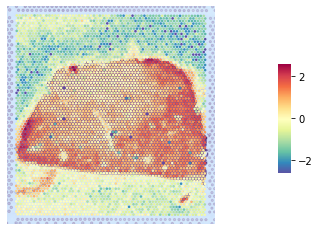

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


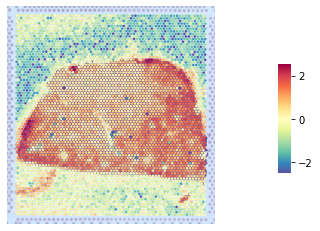

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


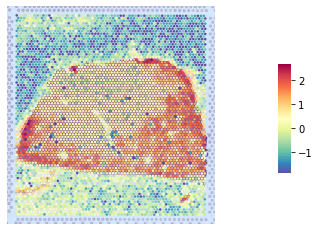

<Figure size 432x288 with 0 Axes>

In [19]:
for sample in samples:
    adata = all_adata[all_adata.obs["library_id"] == sample]
    # adata.X = adata.to_df().apply(zscore)
    for gene in gene_to_plot:
        try:
            gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                     output=str(OUT_PATH), name=f"gc_{sample}_{gene}.pdf")
            plt.show()
        except:
            continue